In [1]:
#Importing libraries

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno
import datetime
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual


In [2]:
# loading the data
data = pd.read_csv('D:/5 Data Science Projects/Player Performance  Reviewer - Full Material/data-1.csv')
#checking rows and columns
print(data.shape)
print(data.info())
print(data.isnull().sum())

(18207, 89)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  

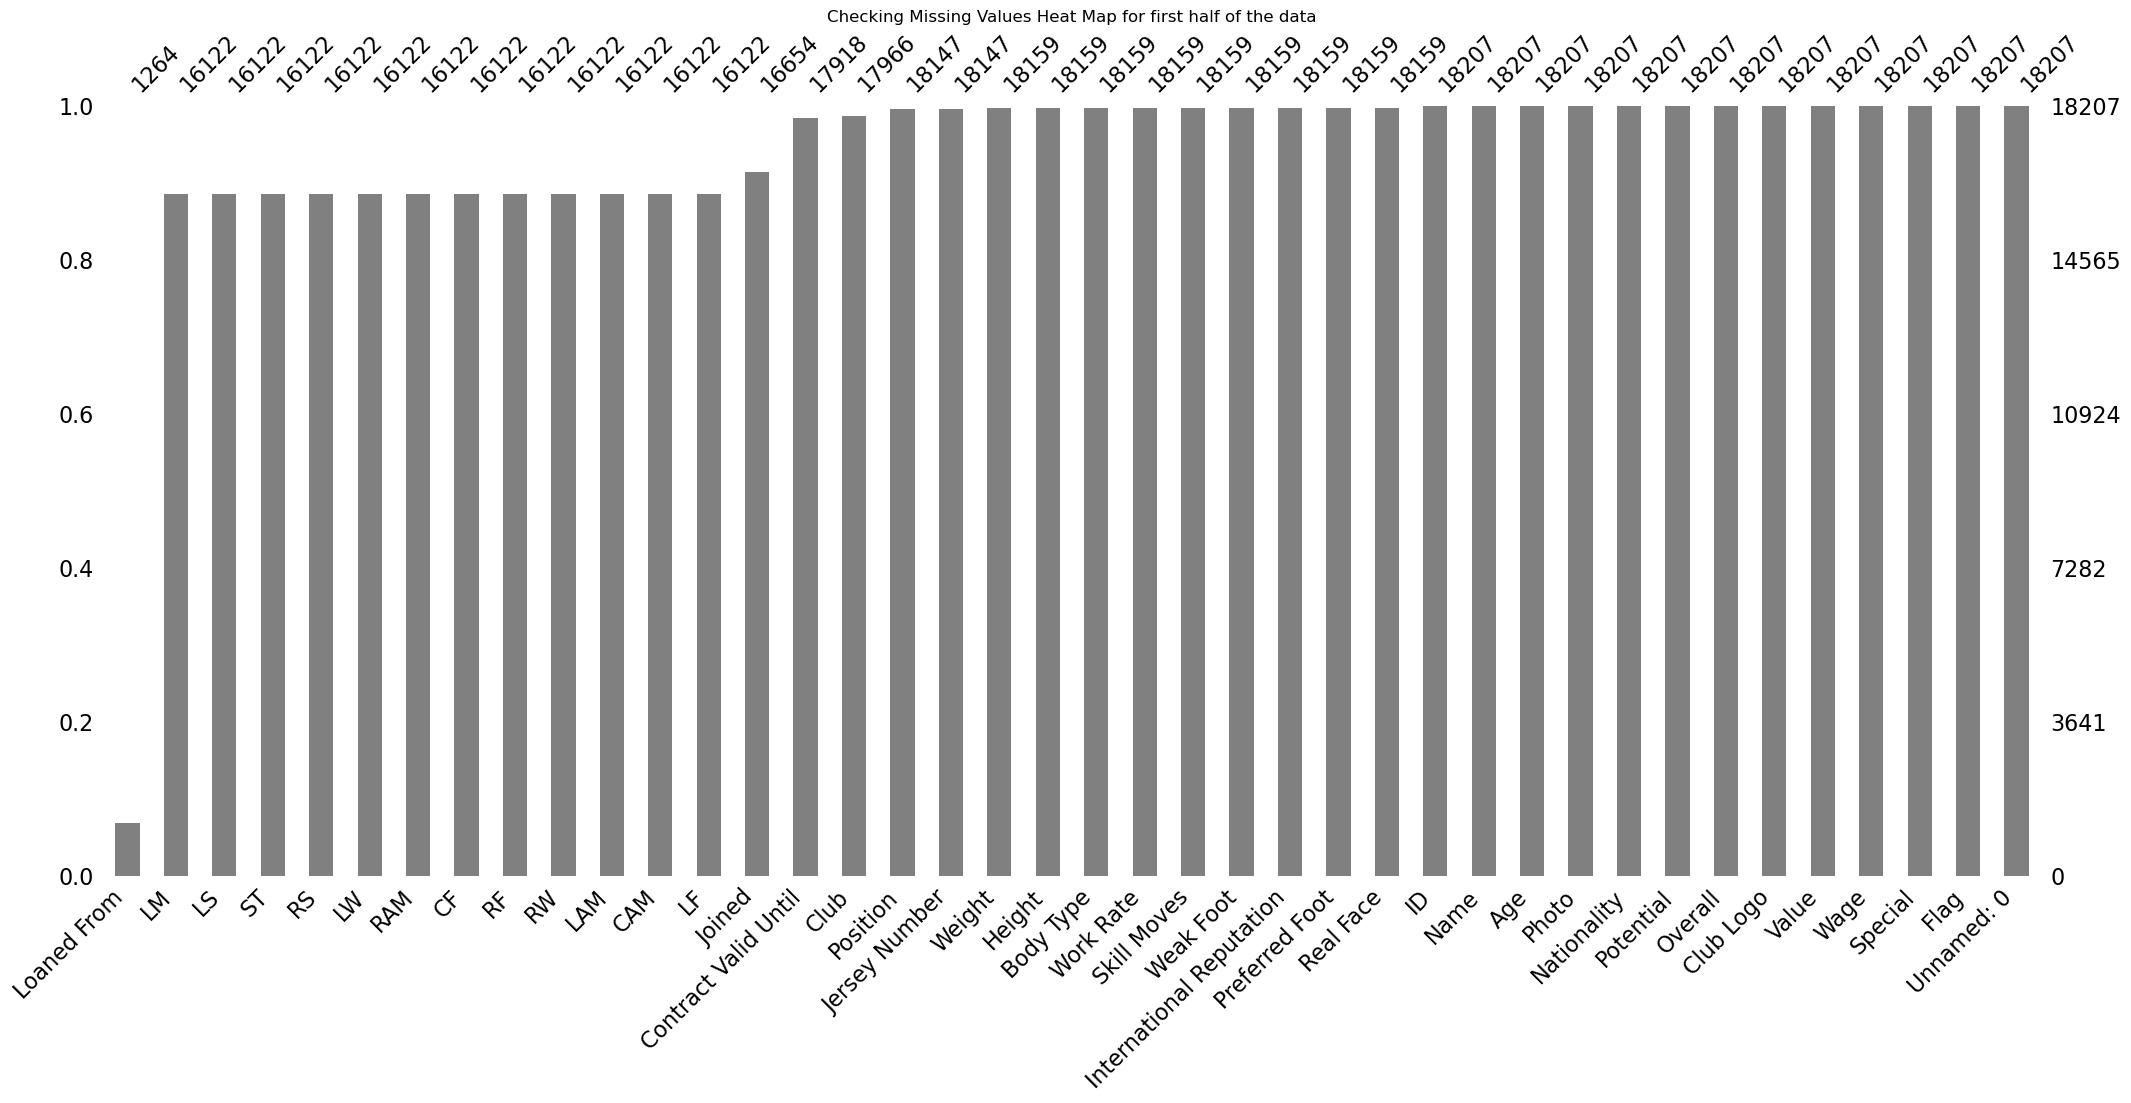

In [3]:
# checking NULL values for first 40 columns using missingno and visualizing it
mno.bar(data.iloc[:, :40],
        color = 'grey',
        sort = 'ascending') 
plt.title('Checking Missing Values Heat Map for first half of the data')
plt.show()

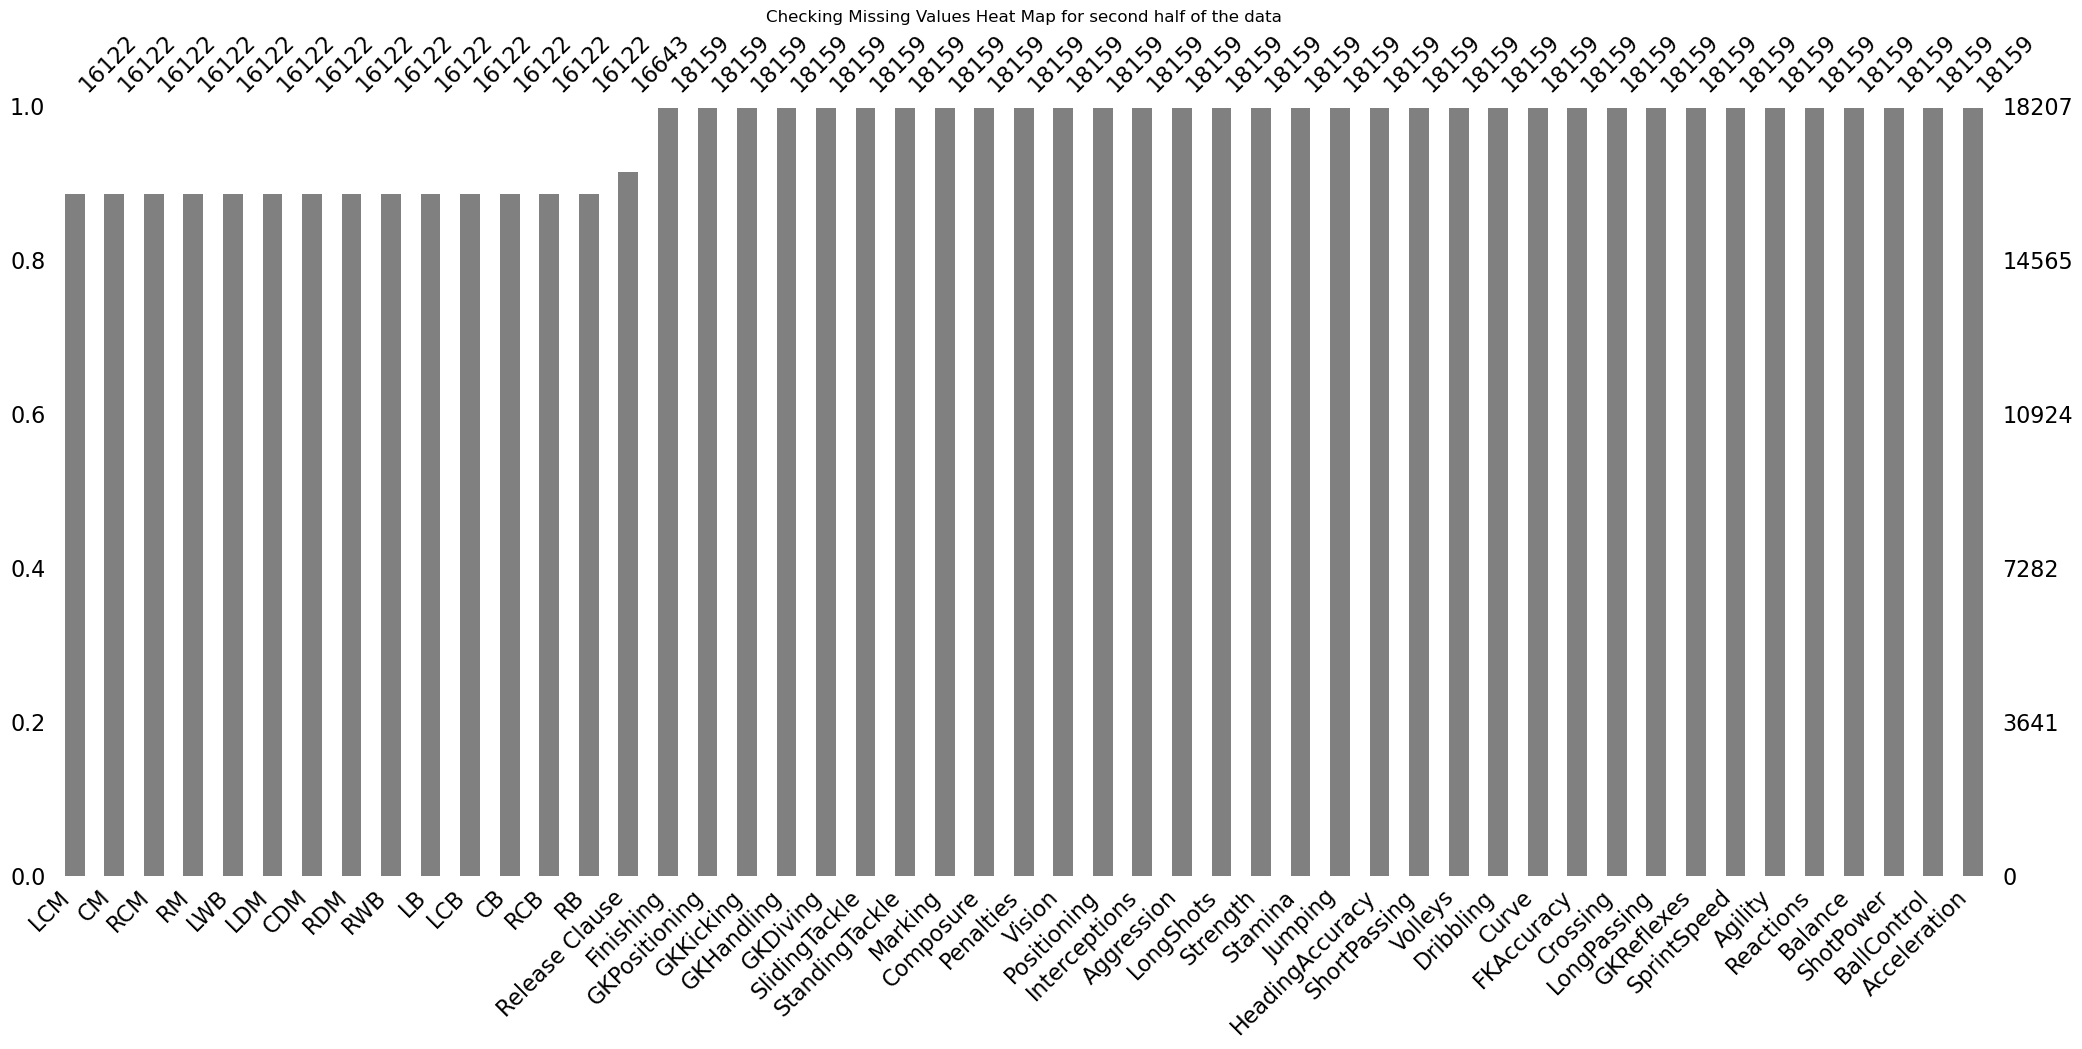

In [4]:
# checking NULL values for remaining columns using missingno and visualizing it
mno.bar(data.iloc[:, 40:],
       color = 'grey',
        sort = 'ascending')
plt.title('Checking Missing Values Heat Map for second half of the data')
plt.show()

In [5]:
# filling the missing value with maen,mode and hardcoded values based on column analysis

data['ShortPassing'].fillna(data['ShortPassing'].mean(), inplace = True)
data['Volleys'].fillna(data['Volleys'].mean(), inplace = True)
data['Dribbling'].fillna(data['Dribbling'].mean(), inplace = True)
data['Curve'].fillna(data['Curve'].mean(), inplace = True)
data['FKAccuracy'].fillna(data['FKAccuracy'], inplace = True)
data['LongPassing'].fillna(data['LongPassing'].mean(), inplace = True)
data['BallControl'].fillna(data['BallControl'].mean(), inplace = True)
data['HeadingAccuracy'].fillna(data['HeadingAccuracy'].mean(), inplace = True)
data['Finishing'].fillna(data['Finishing'].mean(), inplace = True)
data['Crossing'].fillna(data['Crossing'].mean(), inplace = True)

data['Weight'].fillna(data['Weight'].mode(),inplace=True)

data['Contract Valid Until'].fillna(2019, inplace = True)
data['Height'].fillna("5'11", inplace = True)
data['Loaned From'].fillna('None', inplace = True)
data['Joined'].fillna('Jul 1, 2018', inplace = True)
data['Jersey Number'].fillna(8, inplace = True)
data['Body Type'].fillna('Normal', inplace = True)
data['Position'].fillna('ST', inplace = True)
data['Club'].fillna('No Club', inplace = True)
data['Work Rate'].fillna('Medium/ Medium', inplace = True)
data['Skill Moves'].fillna(data['Skill Moves'].median(), inplace = True)
data['Weak Foot'].fillna(3, inplace = True)
data['Preferred Foot'].fillna('Right', inplace = True)
data['International Reputation'].fillna(1, inplace = True)
data['Wage'].fillna('€200K', inplace = True)

#filling remaining NULL values with value 0
data.fillna(0, inplace = True)

#checking missing values
data.isnull().sum().sum()

0

In [6]:
# creating new features by aggregating the features

def defending(data):
    return int(round((data[['Marking', 'StandingTackle', 
                               'SlidingTackle']].mean()).mean()))

def general(data):
    return int(round((data[['HeadingAccuracy', 'Dribbling', 'Curve', 
                               'BallControl']].mean()).mean()))

def mental(data):
    return int(round((data[['Aggression', 'Interceptions', 'Positioning', 
                               'Vision','Composure']].mean()).mean()))

def passing(data):
    return int(round((data[['Crossing', 'ShortPassing', 
                               'LongPassing']].mean()).mean()))

def mobility(data):
    return int(round((data[['Acceleration', 'SprintSpeed', 
                               'Agility','Reactions']].mean()).mean()))
def power(data):
    return int(round((data[['Balance', 'Jumping', 'Stamina', 
                               'Strength']].mean()).mean()))

def rating(data):
    return int(round((data[['Potential', 'Overall']].mean()).mean()))

def shooting(data):
    return int(round((data[['Finishing', 'Volleys', 'FKAccuracy', 
                               'ShotPower','LongShots', 'Penalties']].mean()).mean()))

In [7]:
# adding these categories to the data

data['Defending'] = data.apply(defending, axis = 1)
data['General'] = data.apply(general, axis = 1)
data['Mental'] = data.apply(mental, axis = 1)
data['Passing'] = data.apply(passing, axis = 1)
data['Mobility'] = data.apply(mobility, axis = 1)
data['Power'] = data.apply(power, axis = 1)
data['Rating'] = data.apply(rating, axis = 1)
data['Shooting'] = data.apply(shooting, axis = 1)

# lets check the column names in the data after adding new features
data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

C:\Users\Pradeep\AppData\Local\Temp\ipykernel_15780\333795502.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Defending'], color = 'red')
C:\Users\Pradeep\AppData\Local\Temp\ipykernel_15780\333795502.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['General'], color = 'black')


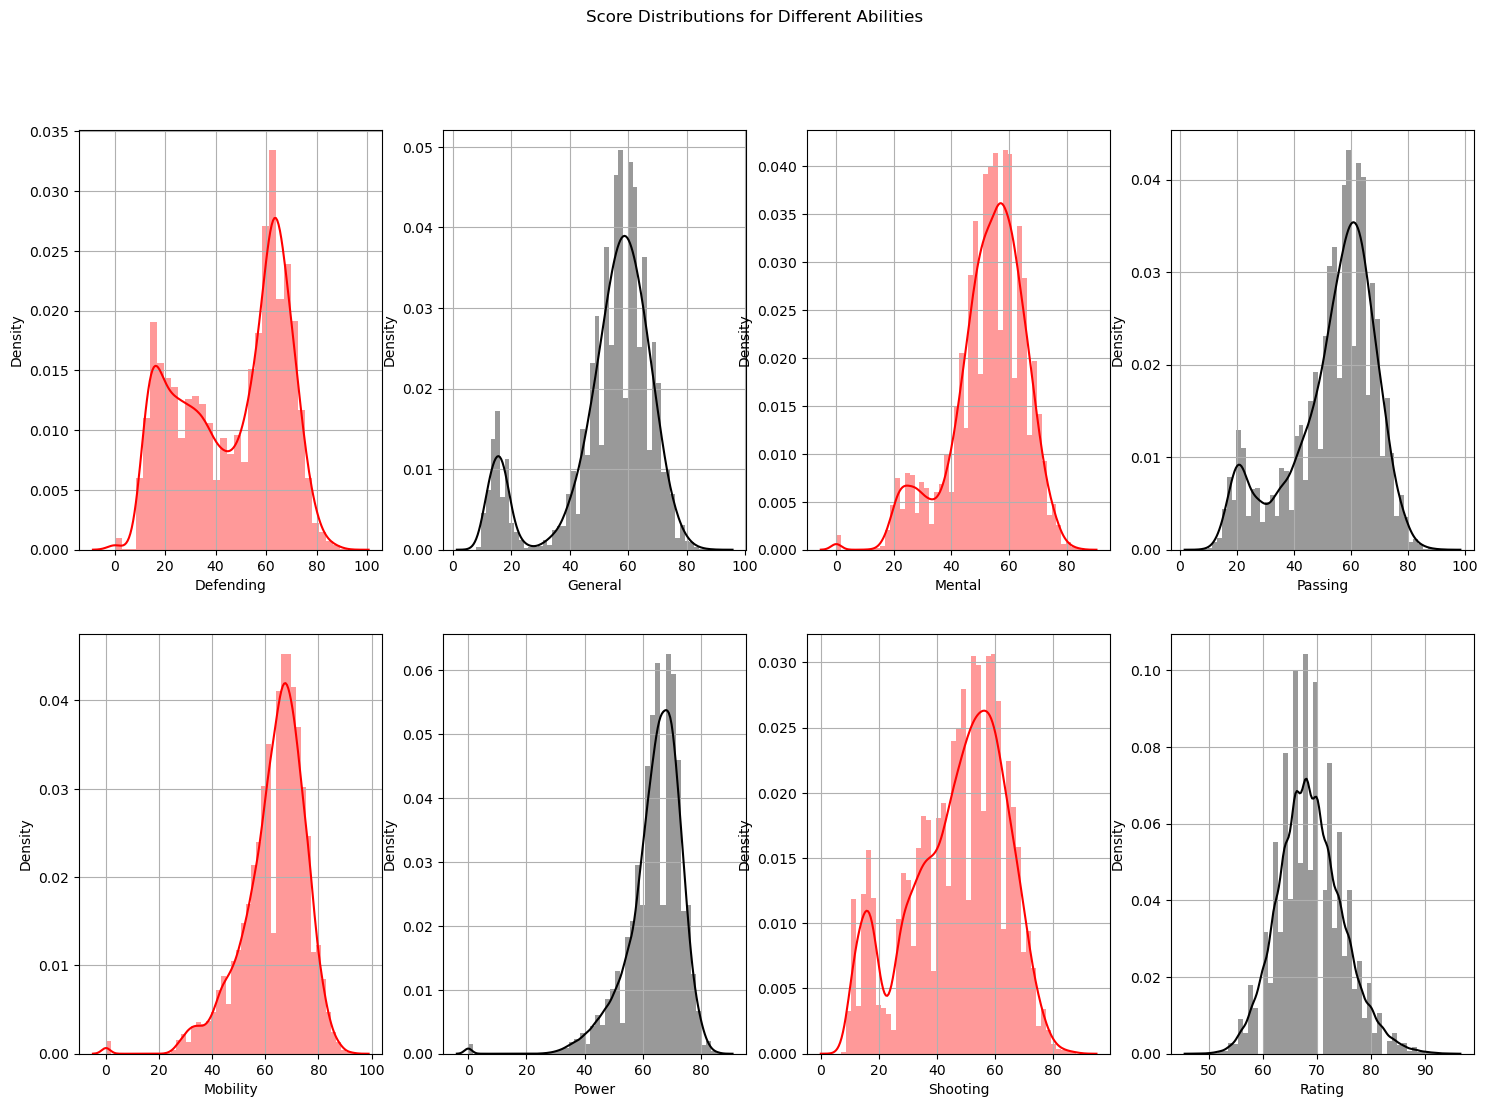

In [8]:
#Distribution of Scores of Different Skills based on feature engineering

plt.rcParams['figure.figsize'] = (18, 12)
plt.subplot(2, 4, 1)
sns.distplot(data['Defending'], color = 'red')
plt.grid()

plt.subplot(2, 4, 2)
sns.distplot(data['General'], color = 'black')
plt.grid()

plt.subplot(2, 4, 3)
sns.distplot(data['Mental'], color = 'red')
plt.grid()

plt.subplot(2, 4, 4)
sns.distplot(data['Passing'], color = 'black')
plt.grid()

plt.subplot(2, 4, 5)
sns.distplot(data['Mobility'], color = 'red')
plt.grid()

plt.subplot(2, 4, 6)
sns.distplot(data['Power'], color = 'black')
plt.grid()

plt.subplot(2, 4, 7)
sns.distplot(data['Shooting'], color = 'red')
plt.grid()

plt.subplot(2, 4, 8)
sns.distplot(data['Rating'], color = 'black')
plt.grid()

plt.suptitle('Score Distributions for Different Abilities')
plt.show()

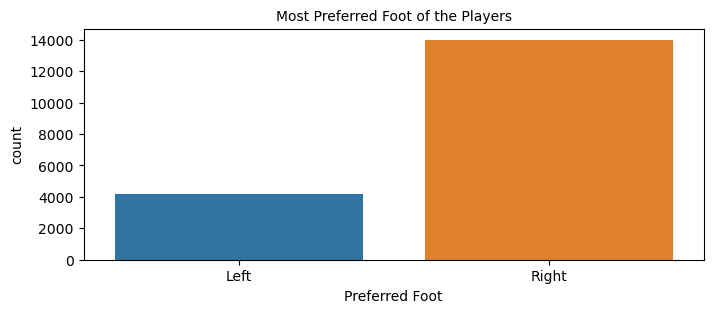

In [9]:
# comparison of preferred foot over the different players

plt.rcParams['figure.figsize'] = (8, 3)
sns.countplot(x=data['Preferred Foot'])
plt.title('Most Preferred Foot of the Players', fontsize = 10)
plt.show()

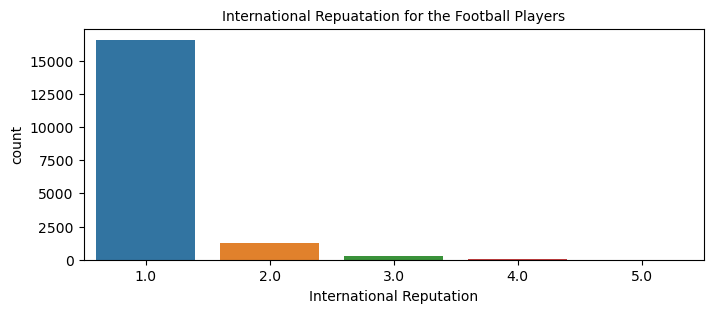

In [10]:
# plotting countplot to represent share of international repuatation

plt.rcParams['figure.figsize'] = (8, 3)
sns.countplot(x=data['International Reputation'])
plt.title('International Repuatation for the Football Players', fontsize = 10)
plt.show()

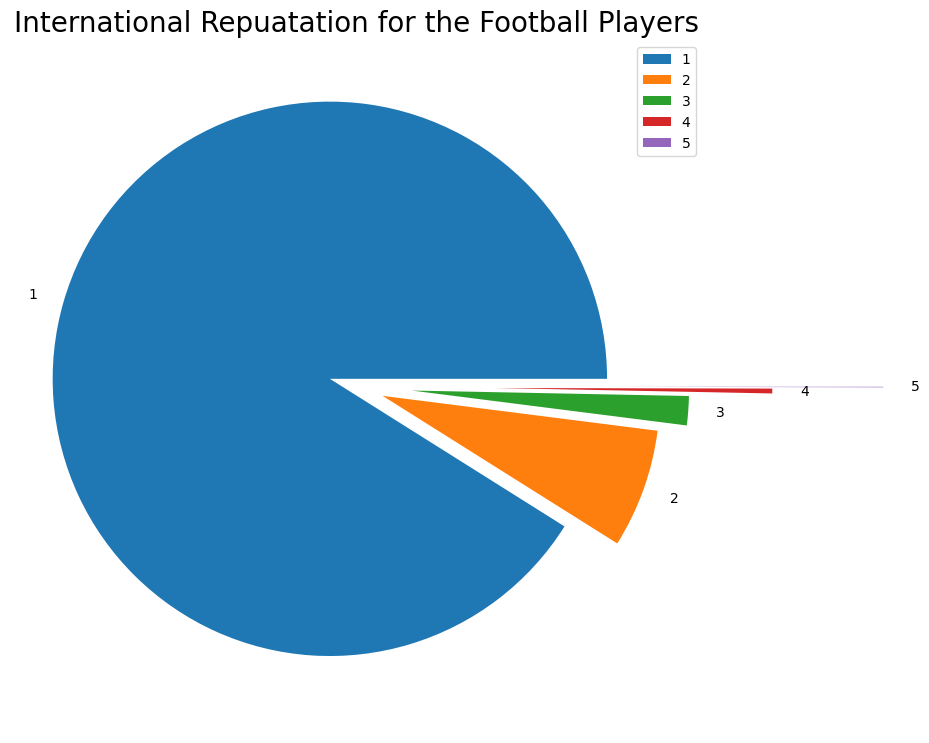

In [11]:
# plotting a pie chart to represent share of international repuatation

labels = ['1', '2', '3', '4', '5']  #data['International Reputation'].index
sizes = data['International Reputation'].value_counts()
explode = [0.1, 0.1, 0.2, 0.5, 0.9]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(sizes, labels = labels, explode = explode)
plt.title('International Repuatation for the Football Players', fontsize = 20)
plt.legend()
plt.show()

In [12]:
#viewing selected columns of 5star rated reputed p
data[data['International Reputation'] == 5][['Name','Nationality',
                            'Overall']]

,Name,Nationality,Overall
0,L. Messi,Argentina,94
1,Cristiano Ronaldo,Portugal,94
2,Neymar Jr,Brazil,92
7,L. Suárez,Uruguay,91
22,M. Neuer,Germany,89
109,Z. Ibrahimović,Sweden,85


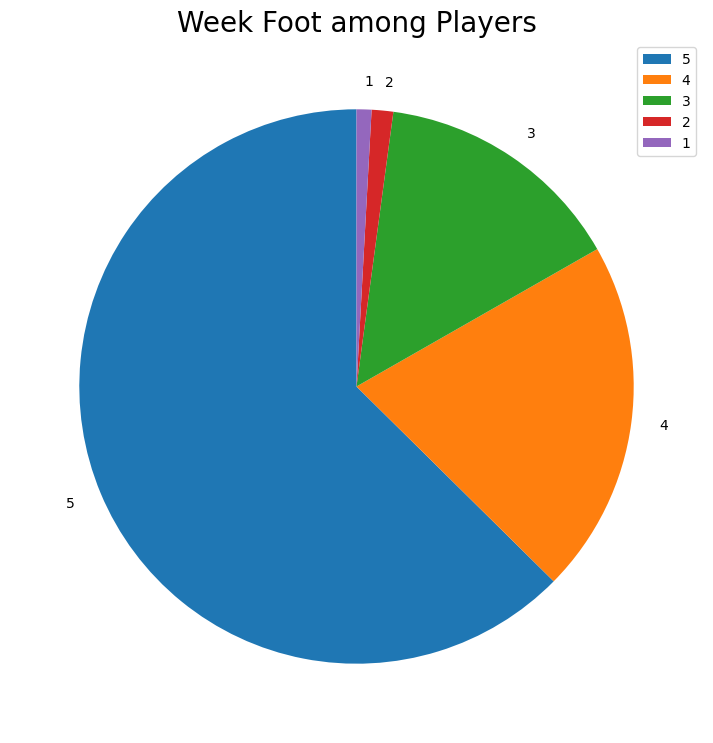

In [13]:
# plotting a pie chart to represent Week Foot among Players

labels = ['5','4','3','2','1'] 
sizes = data['Weak Foot'].value_counts()

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(sizes, labels = labels, startangle = 90)
plt.title('Week Foot among Players', fontsize = 20)
plt.legend()
plt.show()

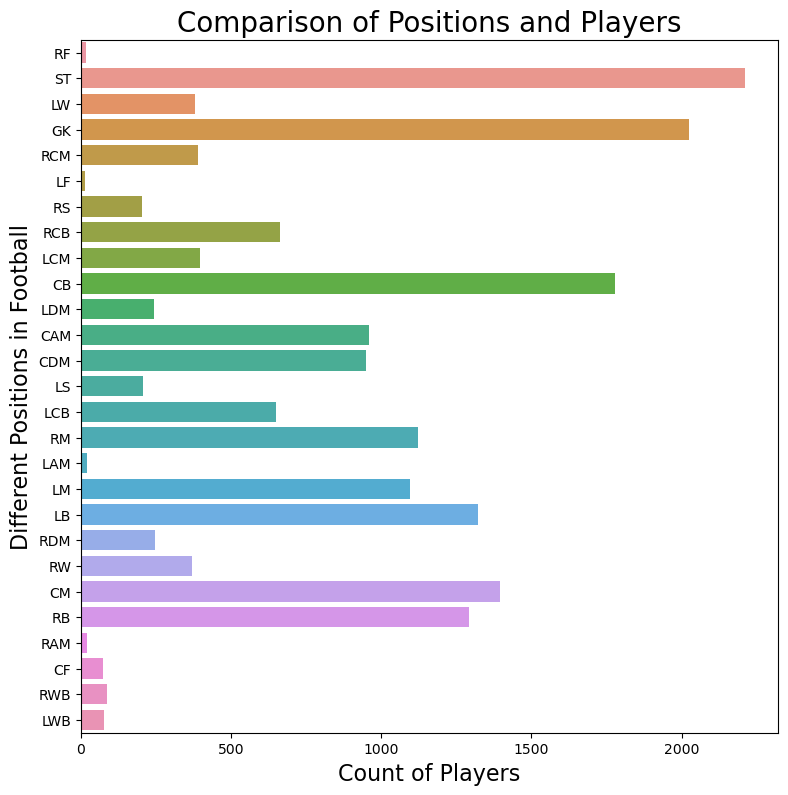

In [14]:
# different positions acquired by the players 
plt.figure(figsize = (9,9))
ax = sns.countplot(y = 'Position', data = data)
ax.set_xlabel(xlabel = 'Count of Players', fontsize = 16)
ax.set_ylabel(ylabel = 'Different Positions in Football', fontsize = 16)
ax.set_title(label = 'Comparison of Positions and Players', fontsize = 20)
plt.show()


C:\Users\Pradeep\AppData\Local\Temp\ipykernel_15780\1451629379.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Weight'])


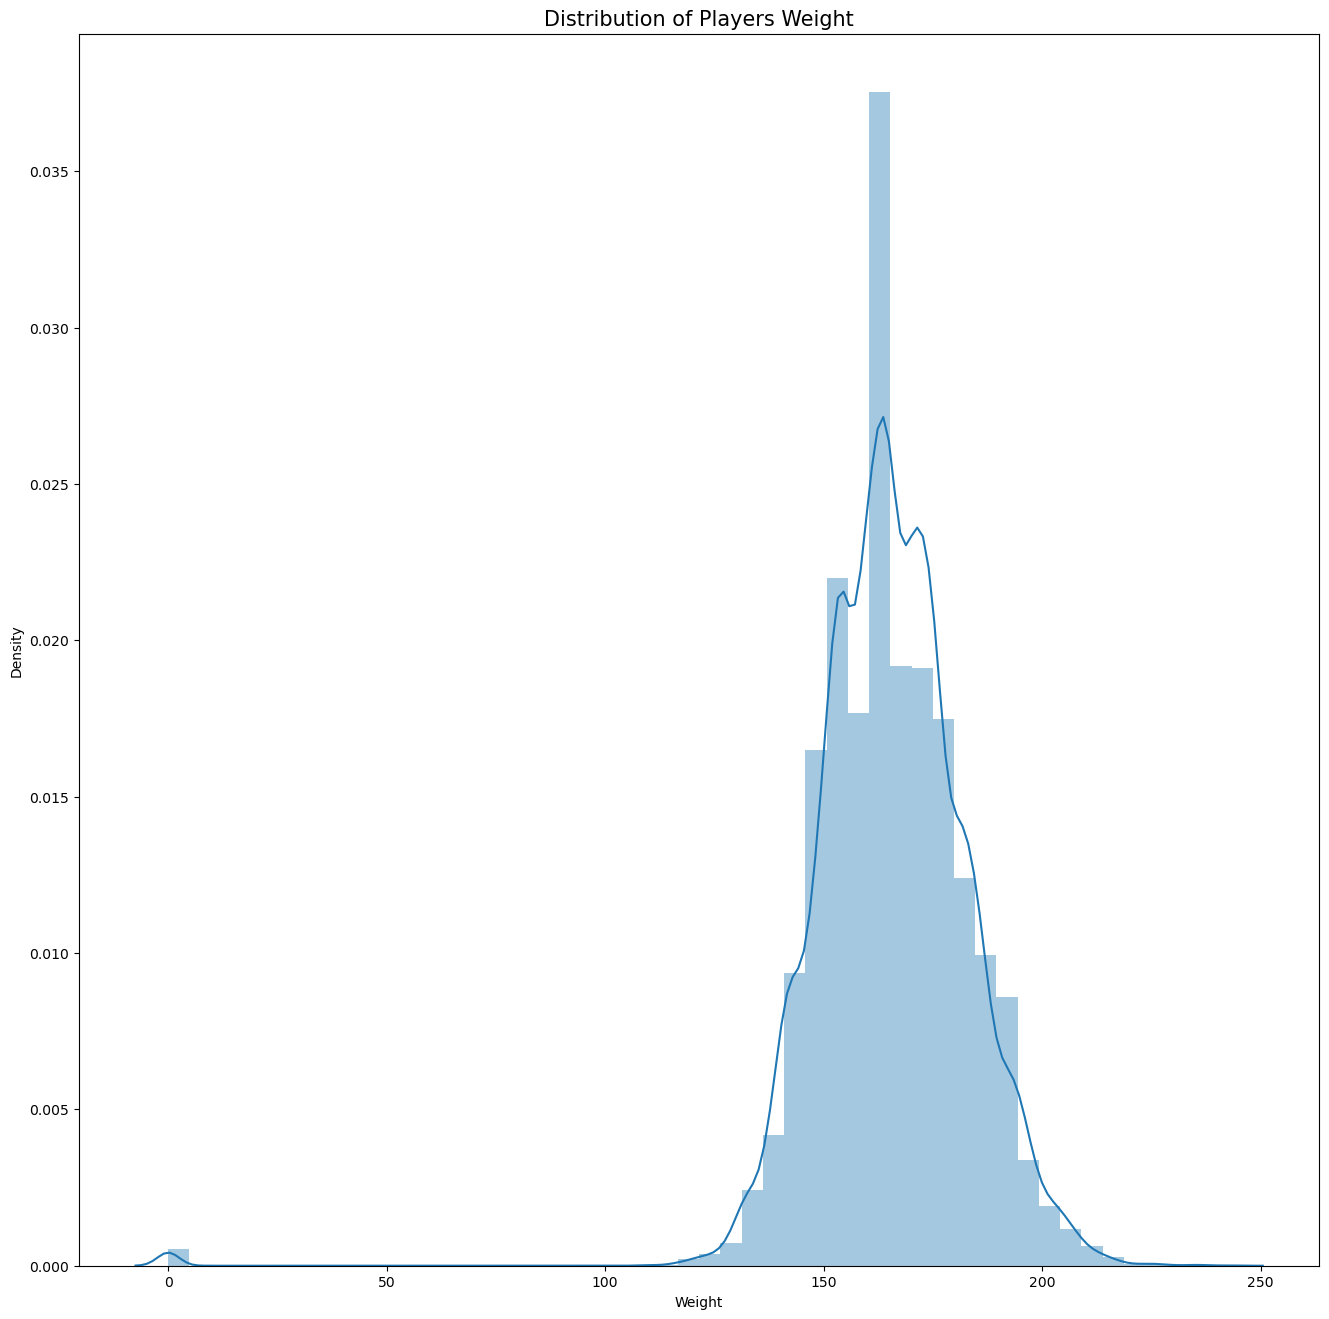

In [15]:
# defining a function for cleaning the Weight data
def extract(value):
  a = str(value).replace('lbs', '')
  return float(a)

# applying the function to weight column
data['Weight'] = data['Weight'].apply(lambda x : extract(x))

# plotting the distribution of weight of the players
plt.rcParams['figure.figsize'] = (16,16)
sns.distplot(data['Weight'])
plt.title("Distribution of Players Weight", fontsize = 15)
plt.show()

C:\Users\Pradeep\AppData\Local\Temp\ipykernel_15780\1663190044.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Value'])
C:\Users\Pradeep\AppData\Local\Temp\ipykernel_15780\1663190044.py:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Wage'])


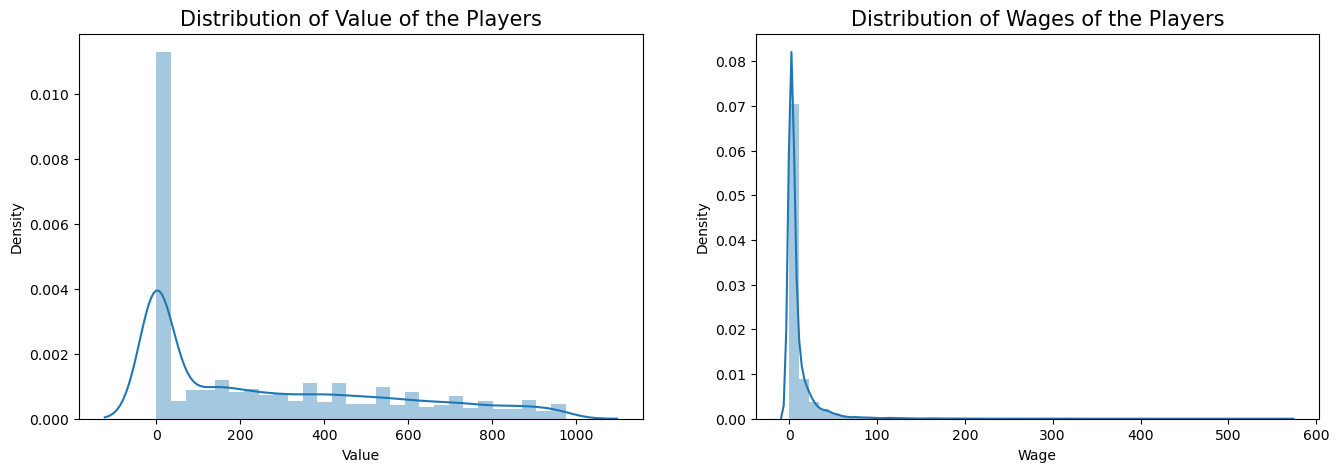

In [16]:
# defining a function for cleaning the wage column

def extract(column):
    column = str(column)
    out = column.replace('€', '')
    if 'M' in out:
        out = float(out.replace('M', ''))/1000
    elif 'K' in column:
        out = float(out.replace('K', ''))
    return float(out)


# applying the function to the wage and value column
data['Value'] = data['Value'].apply(lambda x: extract(x))
data['Wage'] = data['Wage'].apply(lambda x: extract(x))

# visualizing the data
plt.rcParams['figure.figsize'] = (16, 5)
plt.subplot(1, 2, 1)
sns.distplot(data['Value'])
plt.title('Distribution of Value of the Players', fontsize = 15)

plt.subplot(1, 2, 2)
sns.distplot(data['Wage'])
plt.title('Distribution of Wages of the Players', fontsize = 15)
plt.show()

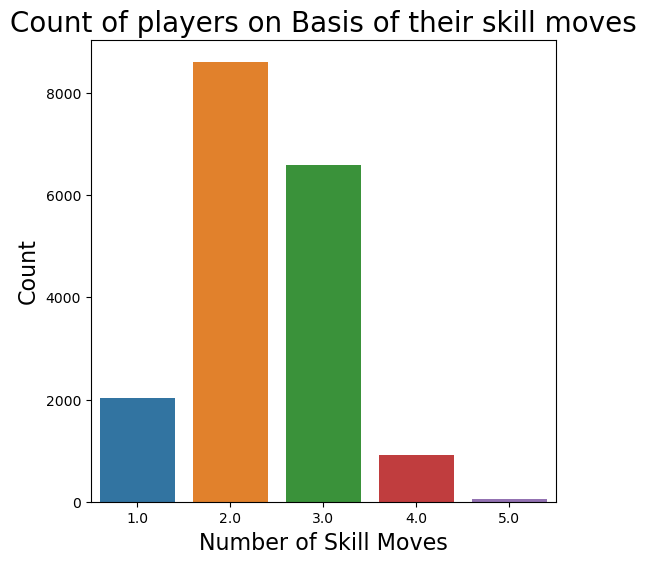

,Name,Age
25,K. Mbappé,19
1004,J. Sancho,18
1143,Vinícius Júnior,17
2495,M. Ødegaard,19


In [17]:
# Skill Moves of Players

plt.figure(figsize = (6, 6))
ax = sns.countplot(x = 'Skill Moves', data = data)
ax.set_title(label = 'Count of players on Basis of their skill moves', fontsize = 20)
ax.set_xlabel(xlabel = 'Number of Skill Moves', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
plt.show()

#viewing skills with value 5-
data[(data['Skill Moves'] == 5.0) & (data['Age'] < 20)][['Name','Age']]

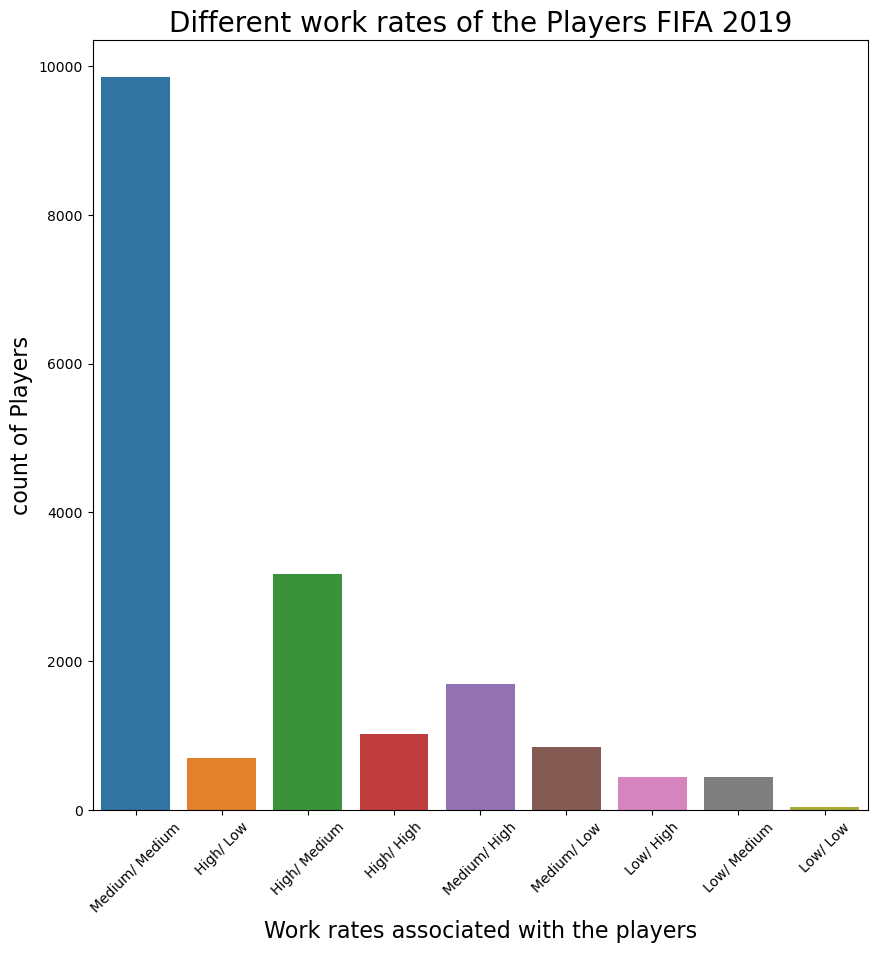

In [18]:
#Different Work rate of the players participating in the FIFA
plt.figure(figsize = (10,10))

sns.countplot(x = 'Work Rate', data = data)
plt.title('Different work rates of the Players FIFA 2019', fontsize = 20)
plt.xlabel('Work rates associated with the players', fontsize = 16)
plt.ylabel('count of Players', fontsize = 16)
plt.xticks(rotation = 45)
plt.show()

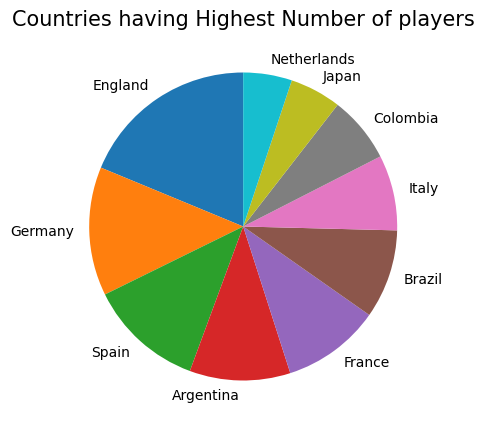

In [19]:
# Top 10 countries with highest number of players

data['Nationality'].value_counts().head(10).plot(kind = 'pie',startangle =90)
plt.title('Countries having Highest Number of players', fontsize = 15)
plt.axis('off')
plt.show()

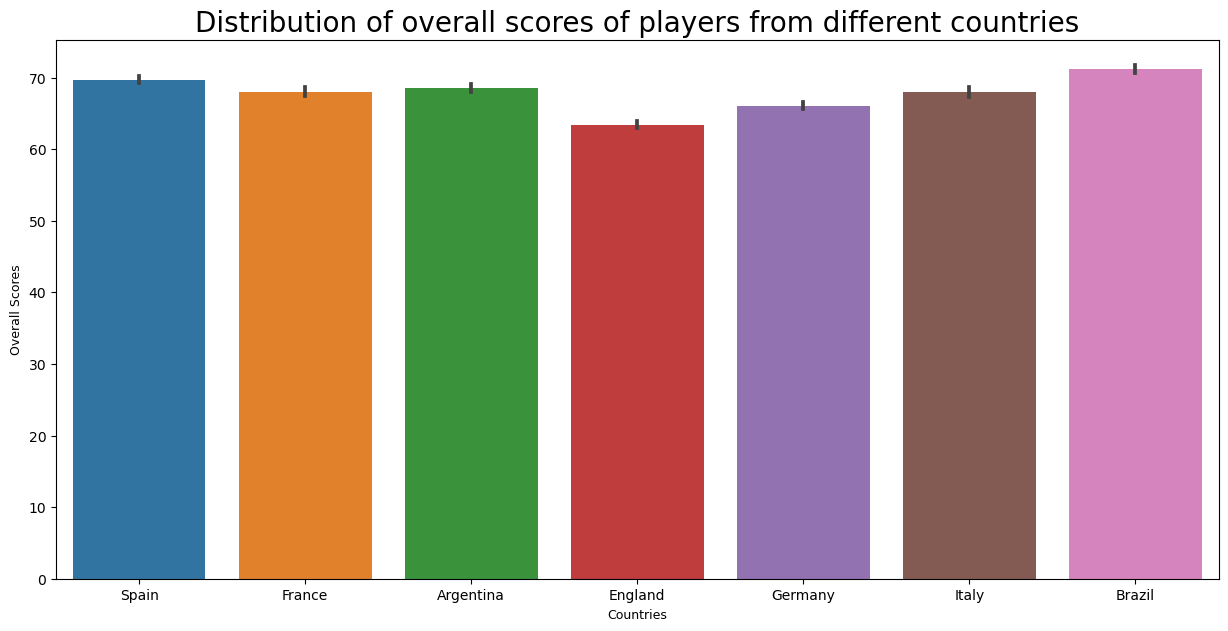

In [20]:
#Some Nations' Player and their overall scores

some_countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia')
data_countries = data.loc[data['Nationality'].isin(some_countries) & data['Overall']]

plt.rcParams['figure.figsize'] = (15, 7)
ax = sns.barplot(x = data_countries['Nationality'], y = data_countries['Overall'])
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Overall Scores', fontsize = 9)
ax.set_title(label = 'Distribution of overall scores of players from different countries', fontsize = 20)
plt.show()

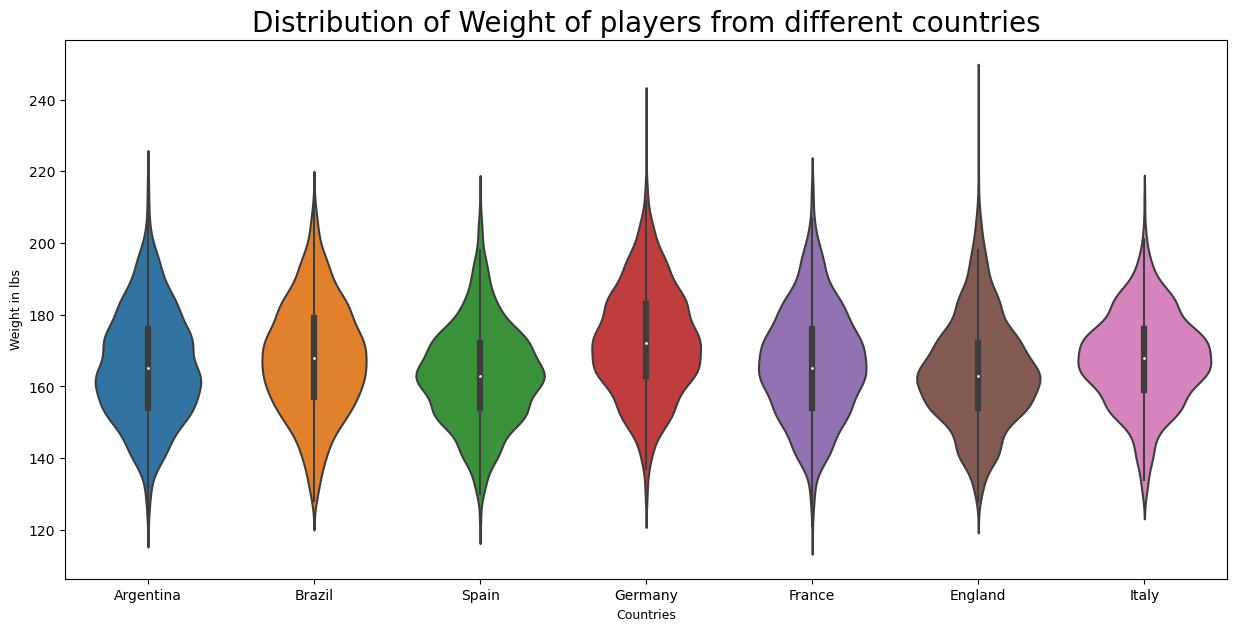

In [21]:
#Some Nations' Player and their Weights

some_countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia')
data_countries = data.loc[data['Nationality'].isin(some_countries) & data['Weight']]

plt.rcParams['figure.figsize'] = (15, 7)
ax = sns.violinplot(x = data_countries['Nationality'], y = data_countries['Weight'])
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Weight in lbs', fontsize = 9)
ax.set_title(label = 'Distribution of Weight of players from different countries', fontsize = 20)
plt.show()

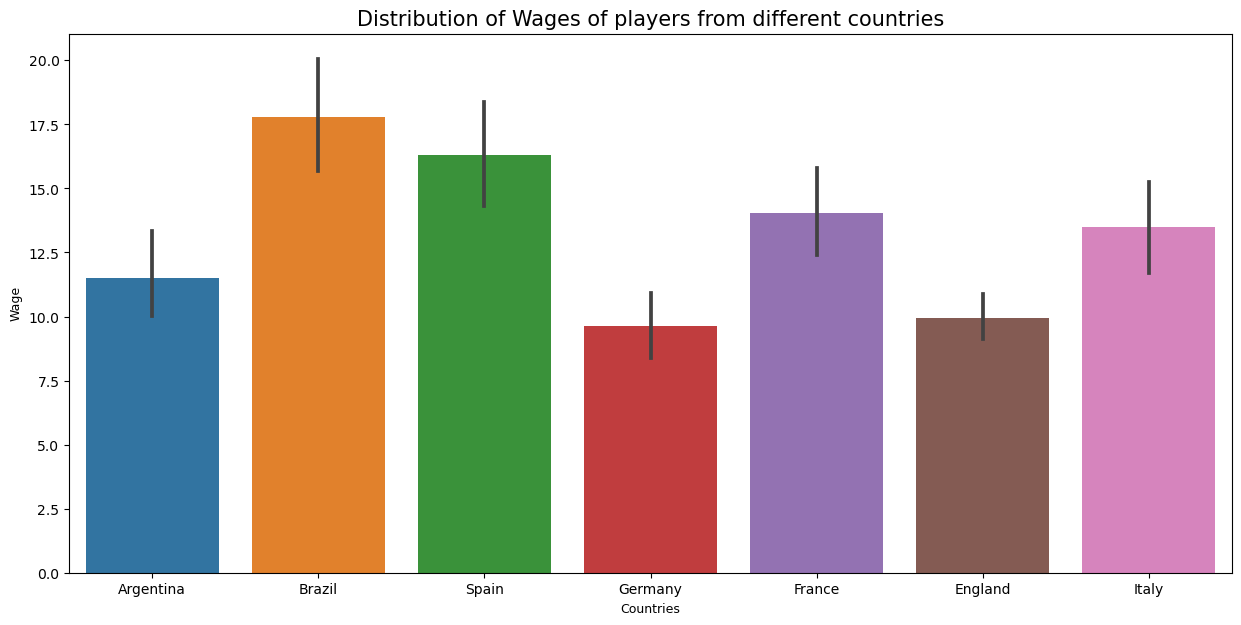

In [22]:
#Some Nations' Player and their wages

some_countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia')
data_countries = data.loc[data['Nationality'].isin(some_countries) & data['Wage']]

plt.rcParams['figure.figsize'] = (15, 7)
ax = sns.barplot(x = data_countries['Nationality'], y = data_countries['Wage'])
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Wage', fontsize = 9)
ax.set_title(label = 'Distribution of Wages of players from different countries', fontsize = 15)
plt.show()

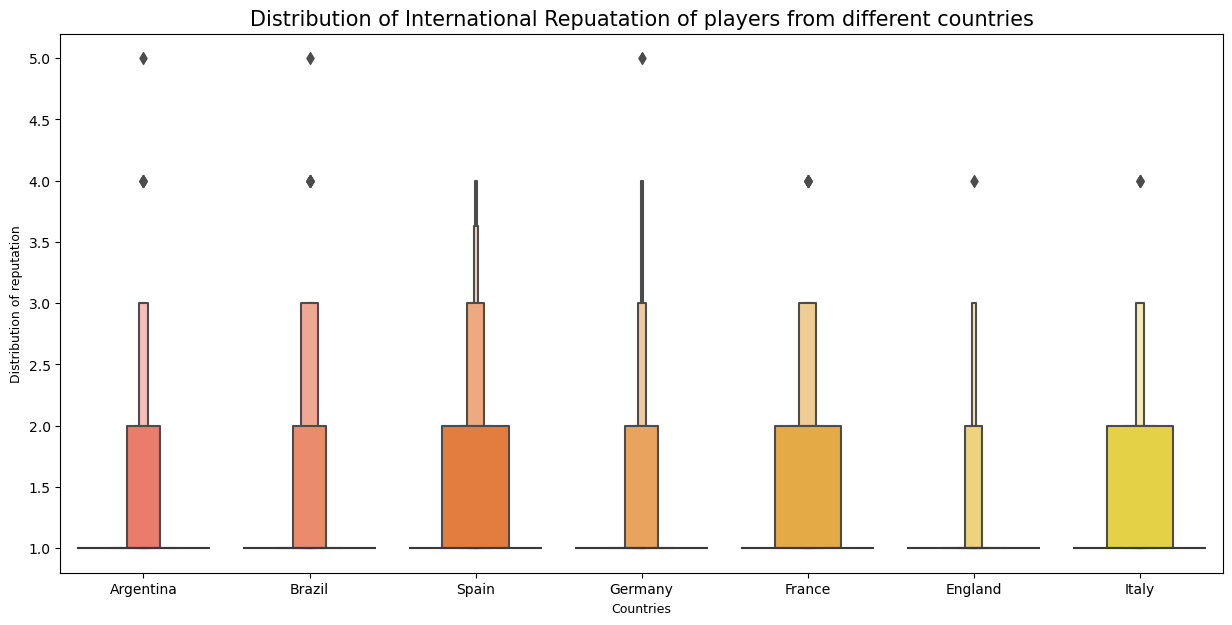

In [23]:
#Some Nations' Player and their International Reputation

some_countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia')
data_countries = data.loc[data['Nationality'].isin(some_countries) & data['International Reputation']]

plt.rcParams['figure.figsize'] = (15, 7)
ax = sns.boxenplot(x = data_countries['Nationality'], y = data_countries['International Reputation'], palette = 'autumn')
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Distribution of reputation', fontsize = 9)
ax.set_title(label = 'Distribution of International Repuatation of players from different countries', fontsize = 15)
plt.show()

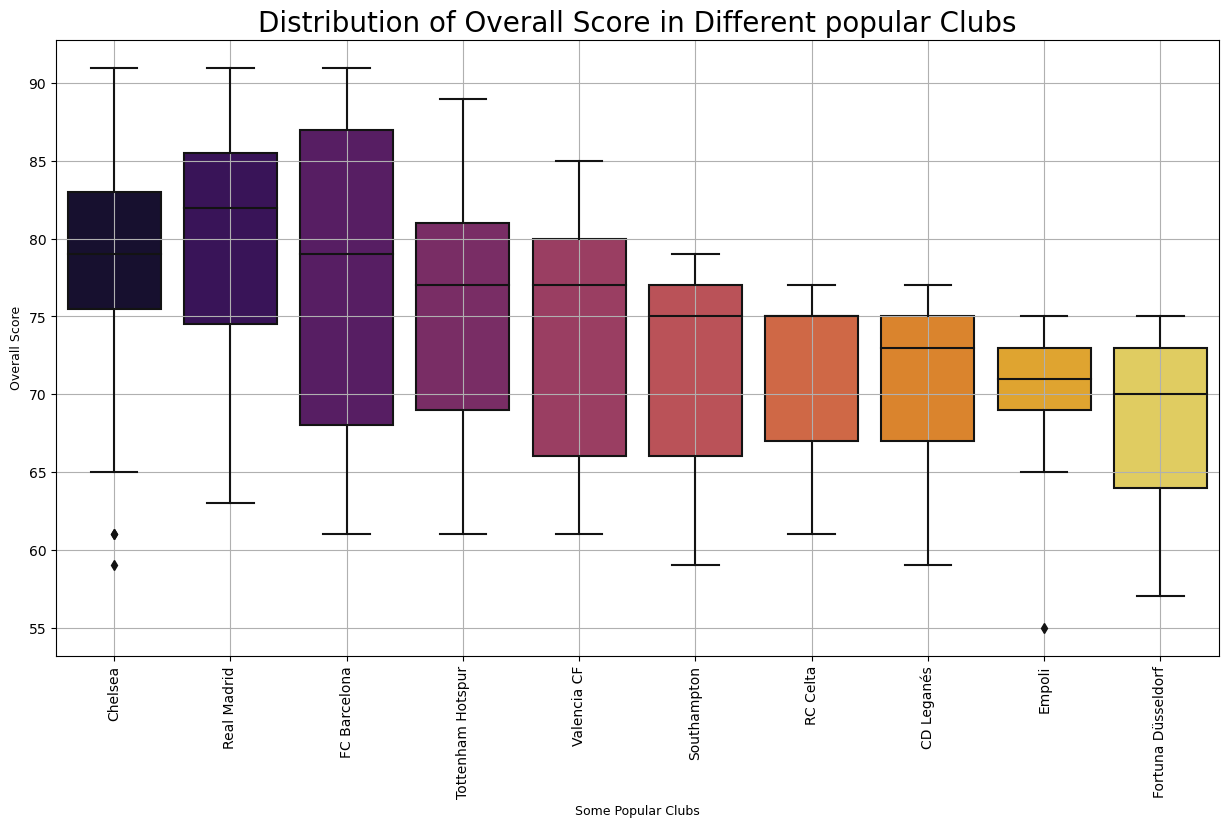

In [24]:
# Some clubs and their overall score

some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchestar City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')

data_clubs = data.loc[data['Club'].isin(some_clubs) & data['Overall']]

plt.rcParams['figure.figsize'] = (15, 8)
ax = sns.boxplot(x = data_clubs['Club'], y = data_clubs['Overall'], palette = 'inferno')
ax.set_xlabel(xlabel = 'Some Popular Clubs', fontsize = 9)
ax.set_ylabel(ylabel = 'Overall Score', fontsize = 9)
ax.set_title(label = 'Distribution of Overall Score in Different popular Clubs', fontsize = 20)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

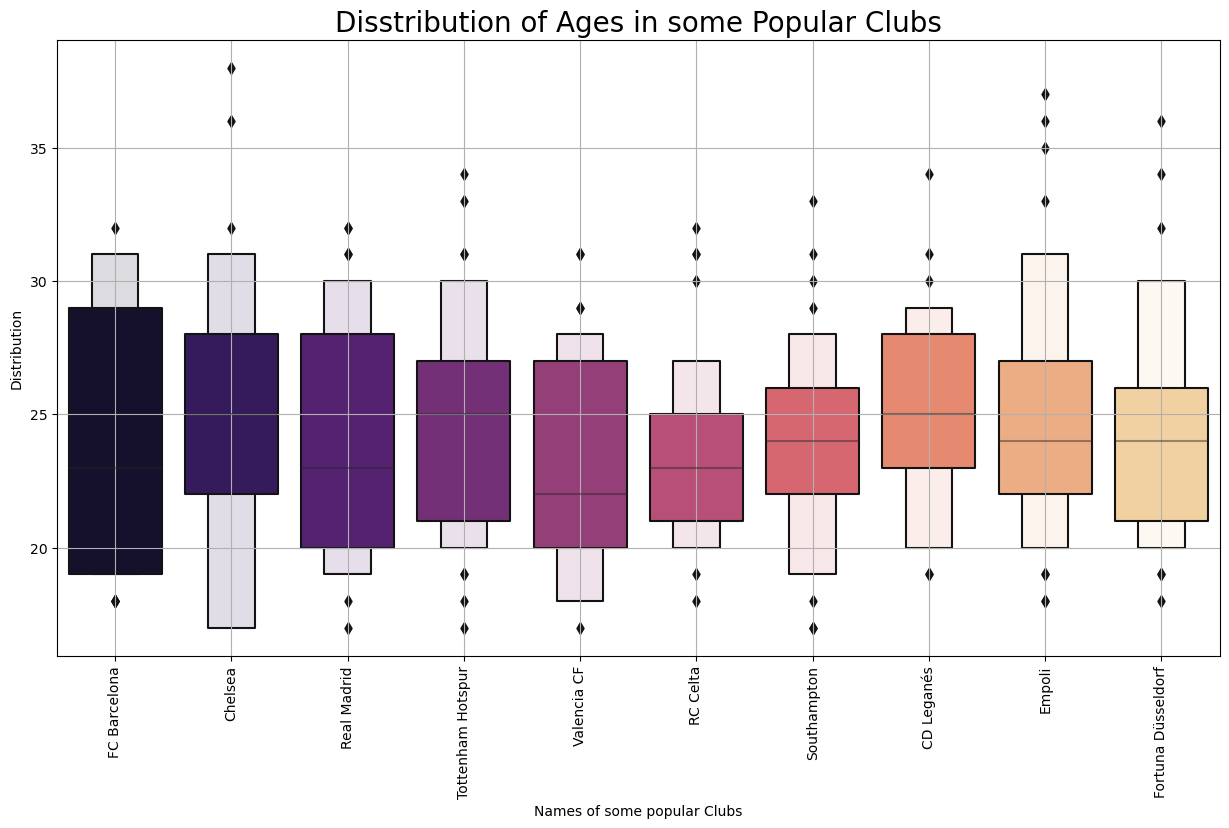

In [25]:
# Distribution of Ages in some Popular clubs

some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchestar City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')

data_club = data.loc[data['Club'].isin(some_clubs) & data['Wage']]

plt.rcParams['figure.figsize'] = (15, 8)
ax = sns.boxenplot(x = 'Club', y = 'Age', data = data_club, palette = 'magma')
ax.set_xlabel(xlabel = 'Names of some popular Clubs', fontsize = 10)
ax.set_ylabel(ylabel = 'Distribution', fontsize = 10)
ax.set_title(label = 'Disstribution of Ages in some Popular Clubs', fontsize = 20)
plt.xticks(rotation = 90)
plt.grid()
plt.show()


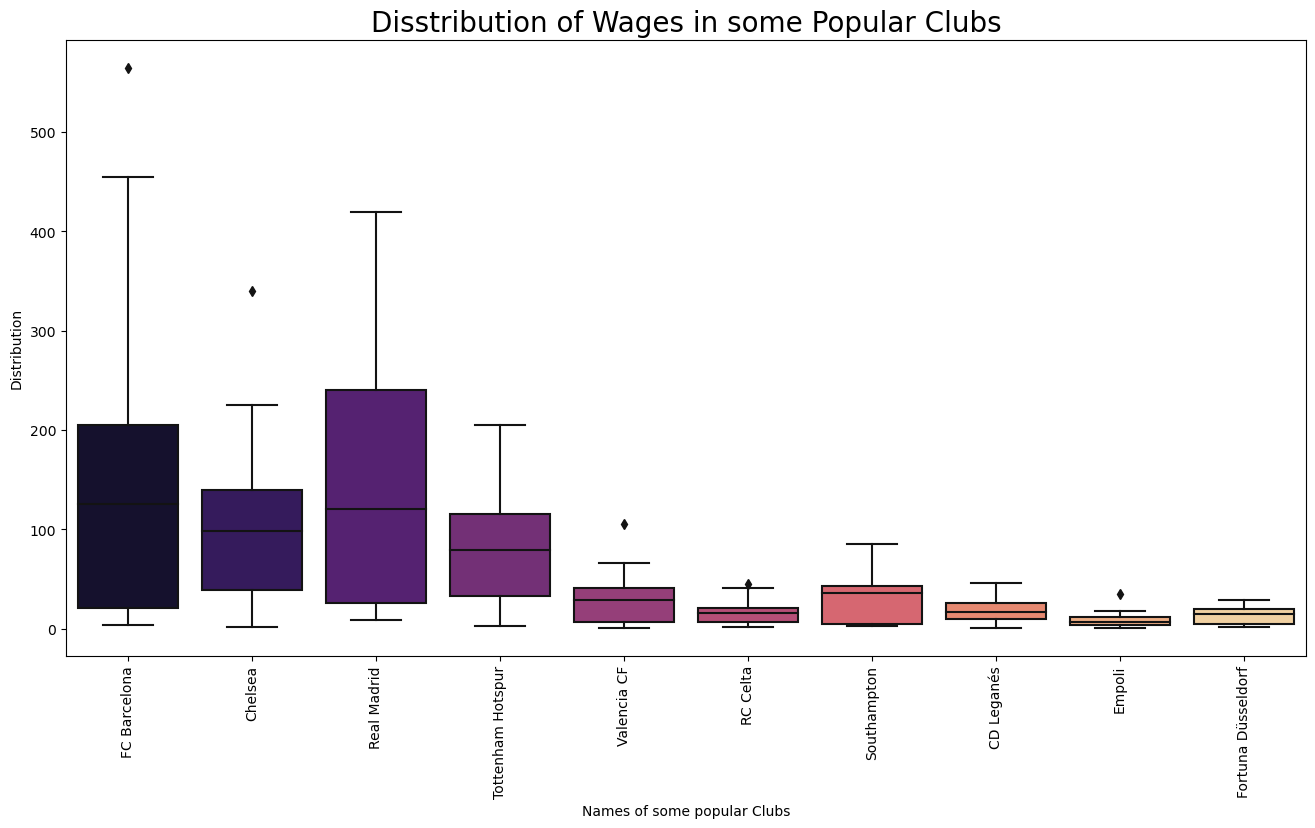

In [26]:
# Distribution of Wages in some Popular clubs

some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchestar City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')

data_club = data.loc[data['Club'].isin(some_clubs) & data['Wage']]

plt.rcParams['figure.figsize'] = (16, 8)
ax = sns.boxplot(x = 'Club', y = 'Wage', data = data_club, palette = 'magma')
ax.set_xlabel(xlabel = 'Names of some popular Clubs', fontsize = 10)
ax.set_ylabel(ylabel = 'Distribution', fontsize = 10)
ax.set_title(label = 'Disstribution of Wages in some Popular Clubs', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

In [27]:
#best players per each position with their age, club, and nationality based on their overall scores

data.iloc[data.groupby(data['Position'])['Overall'].idxmax()][['Position', 'Name', 'Age', 'Club',
                             'Nationality','Overall']].sort_values(by = 'Overall',
                                        ascending = False)

,Position,Name,Age,Club,Nationality,Overall
1,ST,Cristiano Ronaldo,33,Juventus,Portugal,94
0,RF,L. Messi,31,FC Barcelona,Argentina,94
2,LW,Neymar Jr,26,Paris Saint-Germain,Brazil,92
5,LF,E. Hazard,27,Chelsea,Belgium,91
7,RS,L. Suárez,31,FC Barcelona,Uruguay,91
4,RCM,K. De Bruyne,27,Manchester City,Belgium,91
3,GK,De Gea,27,Manchester United,Spain,91
8,RCB,Sergio Ramos,32,Real Madrid,Spain,91
12,CB,D. Godín,32,Atlético Madrid,Uruguay,90
11,LCM,T. Kroos,28,Real Madrid,Germany,90


In [28]:
#Analyzig the Skills of Players

@interact
def skill(skills = ['Defending', 'General', 'Mental', 'Passing', 
                       'Mobility', 'Power', 'Rating','Shooting'], score = 35):
    return data[data[skills] > score][['Name', 'Nationality', 'Club', 'Overall', skills]].sort_values(by = skills,
                                    ascending = False).head(20)

interactive(children=(Dropdown(description='skills', options=('Defending', 'General', 'Mental', 'Passing', 'Mo…

In [29]:
#interactive function for getting a report of the players country wise

@interact
def country(country = list(data['Nationality'].value_counts().index)):
    return data[data['Nationality'] == country][['Name','Position','Overall',
                    'Potential']].sort_values(by = 'Overall',
                            ascending = False).head(15)

interactive(children=(Dropdown(description='country', options=('England', 'Germany', 'Spain', 'Argentina', 'Fr…

In [30]:
#interactive function to get the list of top 15 players from each of the club

@interact
def club(club = list(data['Club'].value_counts().index[1:])):
    return data[data['Club'] == club][['Name','Jersey Number','Position','Overall','Nationality','Age','Wage',
                     'Value','Contract Valid Until']].sort_values(by = 'Overall',
                                ascending  = False).head(15)

interactive(children=(Dropdown(description='club', options=('FC Barcelona', 'Burnley', 'AS Monaco', 'Everton',…

In [31]:
# finding 15 eldest players from the dataset

data.sort_values('Age', ascending = False)[['Name', 'Age', 'Club',
                              'Nationality', 'Overall']].head(15)

,Name,Age,Club,Nationality,Overall
4741,O. Pérez,45,Pachuca,Mexico,71
18183,K. Pilkington,44,Cambridge United,England,48
17726,T. Warner,44,Accrington Stanley,Trinidad & Tobago,53
10545,S. Narazaki,42,Nagoya Grampus,Japan,65
7225,C. Muñoz,41,CD Universidad de Concepción,Argentina,68
1120,J. Villar,41,No Club,Paraguay,77
12192,H. Sulaimani,41,Ohod Club,Saudi Arabia,63
15426,M. Tyler,41,Peterborough United,England,59
4228,B. Nivet,41,ESTAC Troyes,France,71
10356,F. Kippe,40,Lillestrøm SK,Norway,65


In [32]:
# finding 15 eldest players from the dataset

data.sort_values('Age', ascending = True)[['Name', 'Age', 'Club',
                              'Nationality', 'Overall']].head(15)

,Name,Age,Club,Nationality,Overall
18206,G. Nugent,16,Tranmere Rovers,England,46
17743,J. Olstad,16,Sarpsborg 08 FF,Norway,52
13293,H. Massengo,16,AS Monaco,France,62
16081,J. Italiano,16,Perth Glory,Australia,58
18166,N. Ayéva,16,Örebro SK,Sweden,48
17712,K. Broda,16,Wisła Kraków,Poland,53
17354,L. D'Arrigo,16,Adelaide United,Australia,54
13567,Y. Verschaeren,16,RSC Anderlecht,Belgium,62
16927,B. Nygren,16,IFK Göteborg,Sweden,56
18018,B. O'Gorman,16,Bray Wanderers,Republic of Ireland,50


In [33]:
# Top 10 left footed footballers

data[data['Preferred Foot'] == 'Left'][['Name', 'Age', 'Club',
         'Nationality', 'Overall']].sort_values(by = 'Overall',
            ascending = False).head(10)

,Name,Age,Club,Nationality,Overall
0,L. Messi,31,FC Barcelona,Argentina,94
13,David Silva,32,Manchester City,Spain,90
15,P. Dybala,24,Juventus,Argentina,89
17,A. Griezmann,27,Atlético Madrid,France,89
19,T. Courtois,26,Real Madrid,Belgium,89
24,G. Chiellini,33,Juventus,Italy,89
35,Marcelo,30,Real Madrid,Brazil,88
37,H. Lloris,31,Tottenham Hotspur,France,88
36,G. Bale,28,Real Madrid,Wales,88
28,J. Rodríguez,26,FC Bayern München,Colombia,88


In [34]:
# Top 10 Right footed footballers

data[data['Preferred Foot'] == 'Right'][['Name', 'Age', 'Club',
         'Nationality', 'Overall']].sort_values(by = 'Overall',
            ascending = False).head(10)

,Name,Age,Club,Nationality,Overall
1,Cristiano Ronaldo,33,Juventus,Portugal,94
2,Neymar Jr,26,Paris Saint-Germain,Brazil,92
3,De Gea,27,Manchester United,Spain,91
4,K. De Bruyne,27,Manchester City,Belgium,91
5,E. Hazard,27,Chelsea,Belgium,91
6,L. Modrić,32,Real Madrid,Croatia,91
7,L. Suárez,31,FC Barcelona,Uruguay,91
8,Sergio Ramos,32,Real Madrid,Spain,91
9,J. Oblak,25,Atlético Madrid,Slovenia,90
10,R. Lewandowski,29,FC Bayern München,Poland,90
